## Importing the Libraries

In [172]:
# For numerical operations, data manipulation and analysis
import numpy as np              
import pandas as pd

# For plotting the data             
import matplotlib.pyplot as plt 

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For calculating MSE and R-squared values
from sklearn.metrics import r2_score ,mean_squared_error

import random


## [ I ] Load and Explore the Dataset

In [173]:
### Load the data
df = pd.read_csv("Advertising.csv", index_col = 0)

# For visualization of data
print("Size of the data:", df.shape)
df.head()

Size of the data: (200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## [ II ] Standardized the data set
 

In [174]:
# Standardize each column of the data
standardized_data = (df - df.mean()) / df.std()

# Check if the data is standardized
standardized_data.head()

,TV,Radio,Newspaper,Sales
1,0.967425,0.979066,1.774493,1.548168
2,-1.194379,1.080097,0.667903,-0.694304
3,-1.512360,1.524637,1.779084,-0.905135
4,0.051919,1.214806,1.283185,0.858177
5,0.393196,-0.839507,1.278593,-0.215143


## [ III ] Add bias

In [175]:
# Add bias
standardized_data.insert(0,'bias', 1)

In [176]:
# Check Values
standardized_data

,bias,TV,Radio,Newspaper,Sales
1,1,0.967425,0.979066,1.774493,1.548168
2,1,-1.194379,1.080097,0.667903,-0.694304
3,1,-1.512360,1.524637,1.779084,-0.905135
4,1,0.051919,1.214806,1.283185,0.858177
5,1,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...,...
196,1,-1.267759,-1.317724,-0.769287,-1.230964
197,1,-0.615491,-1.236899,-1.031011,-0.828469
198,1,0.348934,-0.940539,-1.109069,-0.234310
199,1,1.590574,1.261955,1.636743,2.199827


## [ IV ] Dividing the dataset into training and testing

Training: 85%    ,  Testing: 15%

In [177]:
x = standardized_data.drop("Sales", axis = 1)
y = standardized_data["Sales"]

In [178]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, test_size=0.15, random_state = 42)

In [179]:
# Dataset for training
print ("Predictors:")
print (x_train)
print ("Sales:")
print (y_train)

Predictors:
     bias        TV     Radio  Newspaper
10      1  0.614501 -1.391814  -0.429504
19      1 -0.906682 -0.186168  -0.562662
56      1  0.604018  1.760378   1.352060
76      1 -1.515854  1.376457   2.702008
151     1  1.556796 -0.630708   0.295978
..    ...       ...       ...        ...
107     1 -1.421508 -0.826036  -0.039213
15      1  0.664586  0.649028   0.709228
93      1  0.822994  0.689441   1.306143
180     1  0.216151 -0.893391  -0.594804
103     1  1.550972 -0.886655  -0.420320

[170 rows x 4 columns]
Sales:
10    -0.655971
19    -0.521806
56     1.854831
76    -1.020133
151    0.398183
         ...   
107   -1.307629
15     0.954009
93     1.030675
180   -0.272642
103    0.149019
Name: Sales, Length: 170, dtype: float64


## [ V ] Functions to Use (for fitting the model)

Initial weights

In [180]:
def initialize_weights():
    random.seed(42)
    theta_0 = random.uniform(0,1)
    theta_1 = random.uniform(0,1)
    theta_2 = random.uniform(0,1)
    theta_3 = random.uniform(0,1)
    
    return np.array([theta_0,theta_1,theta_2,theta_3])

In [181]:
#Checking the function
initialize_weights()

array([0.6394268 , 0.02501076, 0.27502932, 0.22321074])

Vector for predicted values of y

In [182]:
def predict(x, weights):
    return np.dot(x, weights)

Function compute_cost $$ \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 $$

In [183]:
def compute_cost(y_pred, y):
    # Variable for error and m
    error = (y_pred - y)
    m = len(y)
    
    # Solve for cost
    return np.sum(error**2)/(2*m)

Function compute_gradient $$ \alpha\frac{1}{m}\sum_{i=1}^{m}((\hat{y}^{(i)}) - y^{(i)})x_j^{(i)} $$

In [184]:
def compute_gradient(y_pred, y, x):
    # Variable for error
    error = (y_pred - y)
    m = len(y)

    # Partial derivative
    return np.dot(x.T, error) / m

Function update_weights $$ \theta_j := \theta_j - awx_j^{(i)} $$

In [185]:
def update_weights(weights, gradient, lrate):
    return weights - (lrate*gradient)

Function grad_descent 

In [186]:
def grad_descent(x, y , iterations, lrate):
    # Initialize weights
    weights = initialize_weights()

    # Cost and weights matrix
    costs_matrix = []
    weights_matrix = []

    for i in range(iterations):
        # Predicted sales
        y_pred = predict(x, weights)

        # Cost
        cost = compute_cost(y_pred, y)

        # Compute the gradient
        gradient = compute_gradient(y_pred, y, x)

        # Update the weights
        weights = update_weights(weights, gradient, lrate)

        # Concatenate to the matrices
        costs_matrix.append(cost)
        weights_matrix.append(weights)
        
    return costs_matrix, weights_matrix    

Function plot_costs

In [187]:
def plot_costs(cost):
    costs = pd.DataFrame(cost, columns = ['Costs'])

    # Plot dimensions and labels
    fig, ax = plt.subplots(figsize=(13, 7))
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

    # Plotting the data
    ax.plot(costs.index, costs['Costs'], label='Costs', marker='o', color='red')

    # Show plot
    plt.show()
    

## [ VI ]Predicting y using TRAINING data and its costs

Train Model

In [188]:
costs_train, weights_train = grad_descent(x_train, y_train, 5000, 0.001)

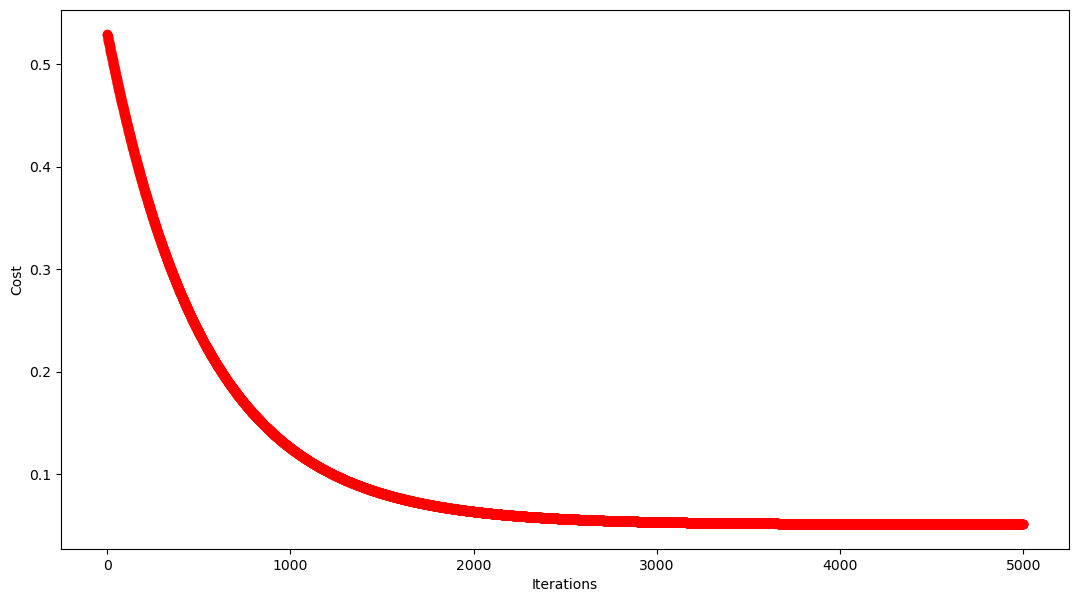

In [189]:
plot_costs(costs_train)

In [190]:
# look at the final costs
costs_train[-10:]

[0.051202000057838495,
 0.0512018342231698,
 0.05120166862623004,
 0.05120150326665697,
 0.05120133814408903,
 0.051201173258165145,
 0.05120100860852493,
 0.05120084419480847,
 0.05120068001665653,
 0.051200516073710386]

Predicted sales for training data

In [191]:
y_pred_training = predict(x_train,weights_train[-1])
y_pred_training

array([-0.28282328, -0.76503163,  1.39551965, -0.33454856,  0.8188765 ,
        1.15359475, -0.01329177,  1.30760966, -0.57114883, -1.78726664,
       -0.81521405, -0.25168265, -0.75504462, -1.10333965, -0.08799076,
       -1.62715062, -0.89474096,  0.0216003 , -0.9743246 , -0.458655  ,
        0.25479198, -0.39782656, -0.23171451, -0.61221945, -1.40335436,
       -0.76535063, -0.85727192,  1.91143462, -1.20298511, -0.28167711,
        0.70892823,  0.2417652 , -0.48636523, -0.59833394,  0.53515806,
       -1.34560633,  1.38958861, -1.48869199, -0.7690581 , -0.48919145,
       -0.89618802, -1.40363745,  0.17181025,  0.62615864,  0.34431817,
        0.42933489,  0.17006727,  1.03609592, -0.00771508,  1.32830176,
       -0.26984661, -0.04792313, -0.95172542,  0.56406468, -1.06410615,
        0.25463811, -0.0588939 ,  1.73409658, -0.29914502,  1.68623822,
       -1.38068411,  0.86806767,  1.79506435,  0.8773305 ,  0.58786547,
        0.44576525, -0.29385851, -0.42554315,  0.56085995,  0.09

Cost (train)

In [192]:
compute_cost(y_pred_training,y_train)

0.051200352365611934

Check MSE (train)

In [193]:
mean_squared_error(y_train, y_pred_training)

0.10240070473122387

## [ VII ]Predict y using TESTING data and its cost

Test Model

In [194]:
costs_test, weights_test = grad_descent(x_test, y_test, 5000, 0.001)

In [195]:
y_pred_testing = predict(x_test,weights_test[-1])
y_pred_testing

array([ 0.43147557,  1.30780554,  1.6135501 , -0.86378109,  1.69613083,
       -0.31949848,  1.43713931, -1.31328231,  0.11174239,  0.27341663,
       -1.01181119, -1.47951067,  0.09020484, -1.09898611, -0.77732006,
       -0.29332444, -1.20570023,  0.55705174, -0.78901161,  1.10178601,
        1.06666762, -0.4562427 , -0.42084296,  1.42743628, -1.17155827,
       -1.61848773,  1.36034381, -0.31589371, -0.95429153, -1.14895613])

Cost (test)

In [196]:
compute_cost(y_pred_testing,y_test)

0.04557134683524103

Check MSE (test)

In [197]:
mean_squared_error(y_test, y_pred_testing)

0.09114269367048206

## [ VIII ]De-standardize both test and training data

In [198]:
destan_data = pd.DataFrame()

In [199]:
# Standardize each column of the data
# Standard deviations
std_tv = df.TV.std()
std_radio = df.Radio.std()
std_news = df.Newspaper.std()
std_sales = df.Sales.std()
# Means
mean_tv = df.TV.mean()
mean_radio = df.Radio.mean()
mean_news = df.Newspaper.mean()
mean_sales = df.Sales.mean()

# One by one de-standardization to not edit bias
destan_data['TV'] = standardized_data.TV.apply(lambda x: (x*std_tv+mean_tv))
destan_data['Radio'] = standardized_data.Radio.apply(lambda x: (x*std_radio+mean_radio))
destan_data['Newspaper'] = standardized_data.Newspaper.apply(lambda x: (x*std_news+mean_news))
destan_data['Sales'] = standardized_data.Sales.apply(lambda x: (x*std_sales+mean_sales))



# Check if the data is standardized
destan_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## [ IX ] Observe and Analyse

In [200]:
destan_x = destan_data.drop("Sales", axis=1)
destan_y = destan_data.Sales

In [201]:
desx_train, desx_test, desy_train, desy_test = train_test_split(x, y, train_size=0.85, test_size=0.15, random_state = 42)

In [202]:
destantrain_cost , destantrain_weight = grad_descent(desx_train, desy_train, 5000, 0.001)

In [203]:
destantrain_ypred = predict(desx_train, destantrain_weight[-1])
destantrain_ypred

array([-0.28282328, -0.76503163,  1.39551965, -0.33454856,  0.8188765 ,
        1.15359475, -0.01329177,  1.30760966, -0.57114883, -1.78726664,
       -0.81521405, -0.25168265, -0.75504462, -1.10333965, -0.08799076,
       -1.62715062, -0.89474096,  0.0216003 , -0.9743246 , -0.458655  ,
        0.25479198, -0.39782656, -0.23171451, -0.61221945, -1.40335436,
       -0.76535063, -0.85727192,  1.91143462, -1.20298511, -0.28167711,
        0.70892823,  0.2417652 , -0.48636523, -0.59833394,  0.53515806,
       -1.34560633,  1.38958861, -1.48869199, -0.7690581 , -0.48919145,
       -0.89618802, -1.40363745,  0.17181025,  0.62615864,  0.34431817,
        0.42933489,  0.17006727,  1.03609592, -0.00771508,  1.32830176,
       -0.26984661, -0.04792313, -0.95172542,  0.56406468, -1.06410615,
        0.25463811, -0.0588939 ,  1.73409658, -0.29914502,  1.68623822,
       -1.38068411,  0.86806767,  1.79506435,  0.8773305 ,  0.58786547,
        0.44576525, -0.29385851, -0.42554315,  0.56085995,  0.09

Cost (destandardized train)

In [204]:
compute_cost(destantrain_ypred , desy_train)

0.051200352365611934

Check MSE (destandardized train)

In [205]:
mean_squared_error(desy_train, destantrain_ypred)

0.10240070473122387

The resulting cost and MSE of the standardized and destandardized/original dataset are similar. We can assume that even if the dataset was not normalized, it will produce the same results

## ::QUESTIONS::

**1.) What are the optimal weights found by your implemented gradient descent? Plug it into the linear model:**

$$ h_\theta(x) = \theta_0 + \theta_1TV + \theta_2Radio + \theta_3Newspaper $$

What are your interpretations regarding the linear model?

With initialized weights generated randomly below

In [206]:
opt_cost, optimal_weights = grad_descent(x_train,y_train,5000,0.001)

In [207]:
optimal_weights[-1]

array([0.00584465, 0.73181605, 0.52526293, 0.0169989 ])

The result will be: if weights are initialized as 0

h0(x) = 0.00584465() + (0.73181605)TV + (0.52526293)Radio + (0.0169989)Newspaper

with the model, we can see that TV has the biggest impact on sales, proceeded by Radio and with the least impact on sales, Newspaper.

**2.) Provide a scatter plot of the $\hat{y}^{(i)}$ and $y^{(i)}$ for both the train and test set. Is there a trend? Provide an r2 score (also available in sklearn).**

$\hat{y}$ vs y of training data

In [240]:
r2_train = r2_score(y_train, y_pred_training)

r2_train

0.8934279216132959

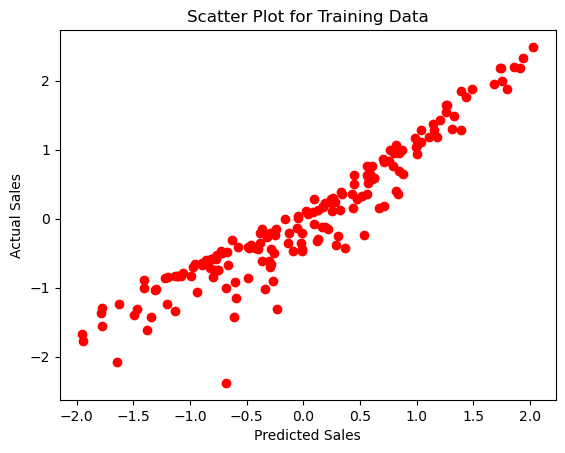

In [209]:
# Scatter Plot for Training Data
plt.scatter(y_pred_training, y_train, color='red', marker='o')
plt.title("Scatter Plot for Training Data")
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
plt.show()


$\hat{y}$ vs y of testing data

In [242]:
r2_test = r2_score(y_test, y_pred_testing)

r2_test

0.922655961316777

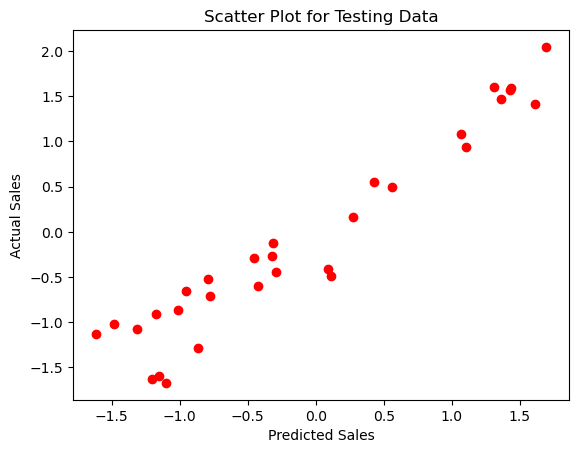

In [211]:
# Scatter Plot for Training Data

plt.scatter(y_pred_testing, y_test, color='red', marker='o')
plt.title("Scatter Plot for Testing Data")
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
plt.show()

Both plot form an almost linear line, implying that the as the actual sales get bigger, so does the predicted sales. In the scatterplot we can see that the data is not too scattered, which could mean that the gradient descent made produced a good approximation of the sales.

**3.) What happens to the error, r2, and cost as the number of iterations increase? Show your data and proof. You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually).**

[] 100 []

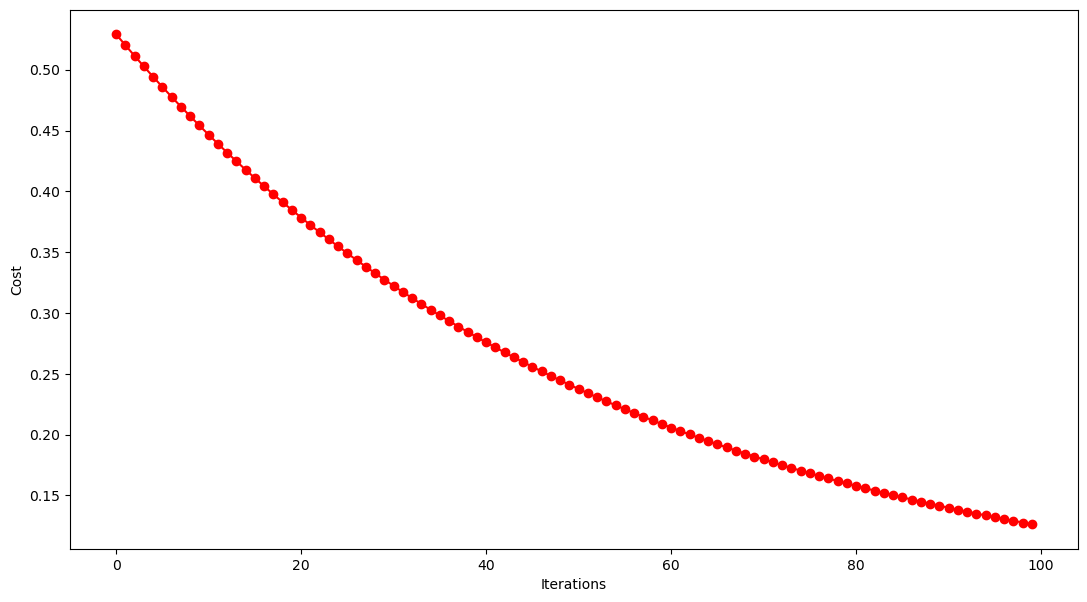

In [212]:
cost_100, weights_100 = grad_descent(x_train, y_train, 100, 0.01)

plot_costs(cost_100)

In [215]:
y_pred100 = predict(x_train,weights_100[-1])

# Outputs error and r2
print ("100_Error:", y_train - y_pred100)
print ("100_R2:", r2_score(y_train, y_pred100))

100_Error: 10    -0.546344
19    -0.184286
56     0.403360
76    -1.517259
151   -0.352394
         ...   
107   -0.539350
15     0.028509
93    -0.071377
180   -0.160490
103   -0.389466
Name: Sales, Length: 170, dtype: float64
100_R2: 0.7398554981237123


[] 1000 []

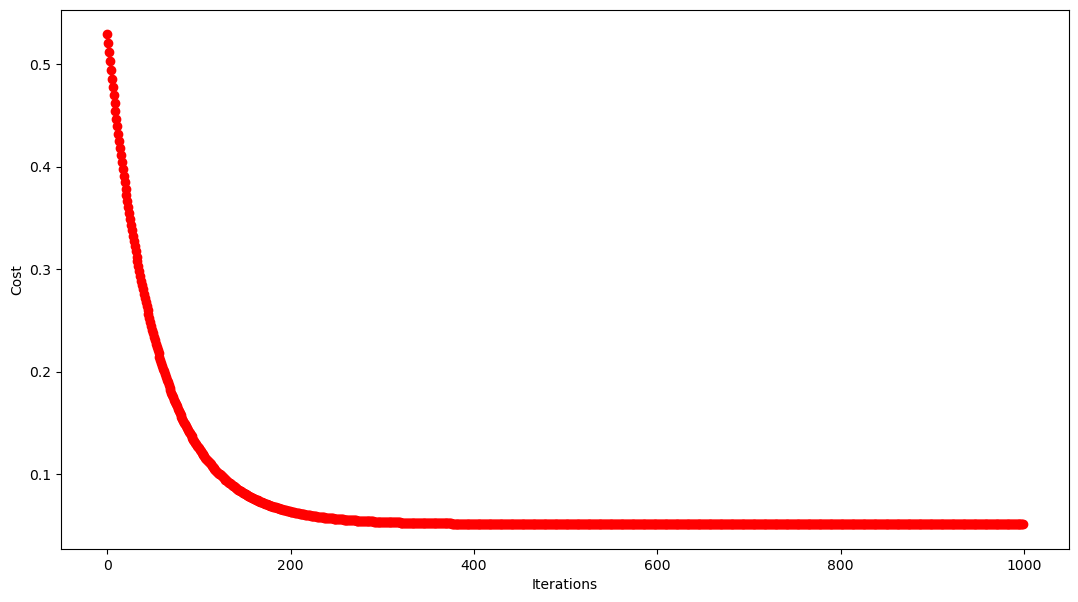

In [216]:
cost_1000, weights_1000 = grad_descent(x_train, y_train, 1000, 0.01)

plot_costs(cost_1000)

In [217]:
y_pred1000 = predict(x_train,weights_1000[-1])

# Outputs error and r2
print ("1000_Error:", y_train - y_pred1000)
print ("1000_R2:", r2_score(y_train, y_pred1000))

1000_Error: 10    -0.362337
19     0.248165
56     0.460728
76    -0.650671
151   -0.413517
         ...   
107    0.182701
15     0.113063
93     0.048968
180    0.048362
103   -0.518511
Name: Sales, Length: 170, dtype: float64
1000_R2: 0.8936788072616394


[] 10,000 []

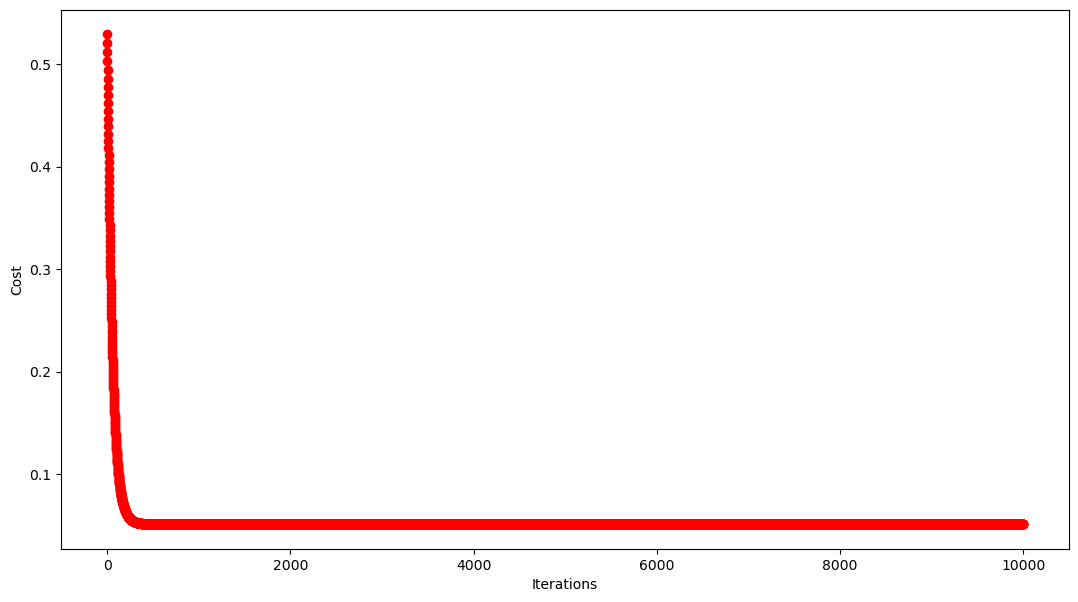

In [218]:
cost_10000, weights_10000 = grad_descent(x_train, y_train, 10000, 0.01)

plot_costs(cost_10000)

In [219]:
y_pred10000 = predict(x_train,weights_10000[-1])

# Outputs error and r2
print ("10000_Error:", y_train - y_pred10000)
print ("10000_R2:", r2_score(y_train, y_pred10000))

10000_Error: 10    -0.361739
19     0.247942
56     0.460650
76    -0.649499
151   -0.412885
         ...   
107    0.183263
15     0.113212
93     0.049520
180    0.048537
103   -0.518237
Name: Sales, Length: 170, dtype: float64
10000_R2: 0.8936793584593189


[] 25,000 []

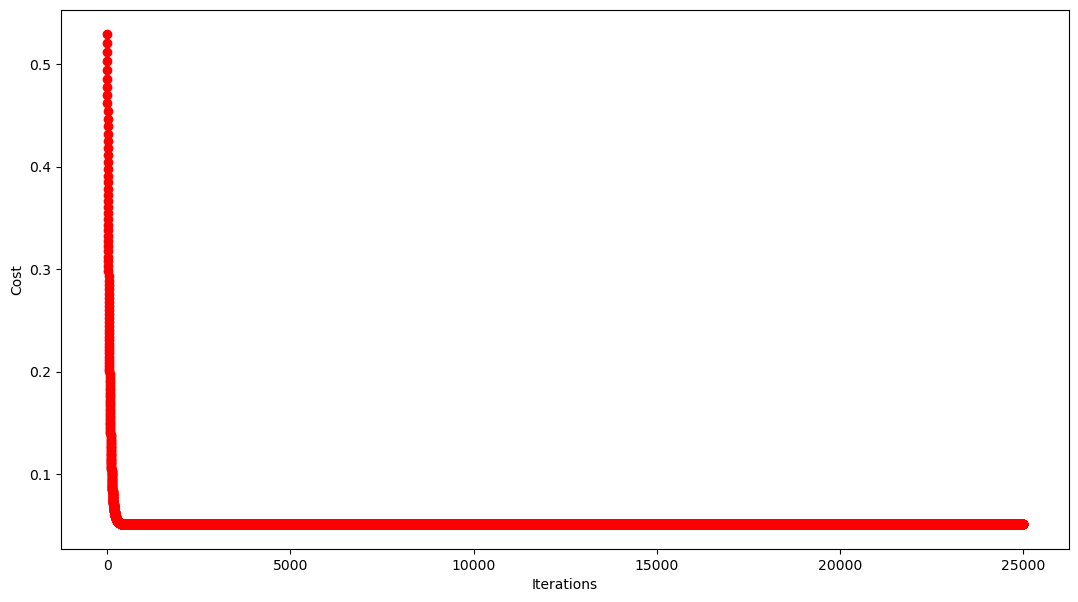

In [235]:
cost_25000, weights_25000 = grad_descent(x_train, y_train, 25000, 0.01)

plot_costs(cost_25000)

In [236]:
y_pred25000 = predict(x_train,weights_25000[-1])

# Outputs error and r2
print ("25000_Error:", y_train - y_pred25000)
print ("25000_R2:", r2_score(y_train, y_pred25000))

25000_Error: 10    -0.361739
19     0.247942
56     0.460650
76    -0.649499
151   -0.412885
         ...   
107    0.183263
15     0.113212
93     0.049520
180    0.048537
103   -0.518237
Name: Sales, Length: 170, dtype: float64
25000_R2: 0.8936793584593189


- In the plots, as the number of iterations increases, the cost gets closer and closer to 0. 
- The errors also get smaller and smaller as iterations increases
- The r2 increases as iterations increases

**4.) Once you determine the optimal number of iterations, check the effect on the cost and
error as you change the learning rate. The common learning rates in machine learning
include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize
the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE
PLOT. Provide your analysis.**

In [221]:
# Get costs for each learning rate
cost_lr1, weights_lr1 = grad_descent(x_train, y_train, 1000, 0.1)
cost_lr01, weights_lr01 = grad_descent(x_train, y_train, 1000, 0.01)
cost_lr001, weights_lr001 = grad_descent(x_train, y_train, 1000, 0.001)
cost_lr0001, weights_lr0001 = grad_descent(x_train, y_train, 1000, 0.0001)
cost_lr2, weights_lr2 = grad_descent(x_train, y_train, 1000, 0.2)


Learning Rate: 0.1 | Final Cost: 0.051079554729786925 | Train MSE: 0.10215910945957385 | Test MSE: 0.10484566169031664 | Train R²: 0.8936793584593189 | Test R²: 0.9110275702091714
Learning Rate: 0.01 | Final Cost: 0.05107982265387869 | Train MSE: 0.10215963908263909 | Test MSE: 0.10489949437081622 | Train R²: 0.8936788072616394 | Test R²: 0.9109818875904632
Learning Rate: 0.001 | Final Cost: 0.12568908777569746 | Train MSE: 0.25110599905081754 | Test MSE: 0.3595679153895644 | Train R²: 0.7386649995773371 | Test R²: 0.6948692908102718
Learning Rate: 0.0001 | Final Cost: 0.4470277044791265 | Train MSE: 0.8939062385528702 | Test MSE: 1.2401195278010335 | Train R²: 0.06967978418246101 | Test R²: -0.05237017765613006
Learning Rate: 0.2 | Final Cost: 0.051079554729786925 | Train MSE: 0.10215910945957385 | Test MSE: 0.10484566169031671 | Train R²: 0.8936793584593189 | Test R²: 0.9110275702091712


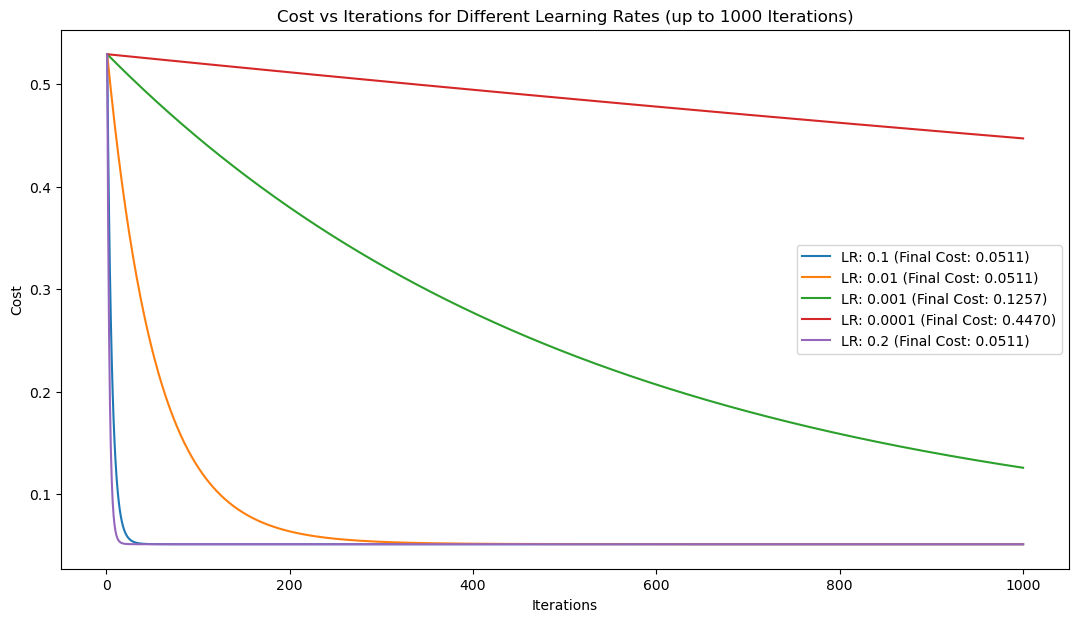

In [237]:
# Gradient descent function with learning rate analysis
def grad_descent_lr(x_train, y_train, x_test, y_test, w_init, learning_rates, iterations):
    output = []
    for lr in learning_rates:
        weight_lr = w_init.copy()
        costs = []
        # Gradient Descent for all iterations in one
        for i in range(iterations):
            pred_lr = predict(x_train, weight_lr)
            gradients = compute_gradient(pred_lr, y_train, x_train)
            weight_lr = update_weights(weight_lr, gradients, lr)
            cost = compute_cost(pred_lr, y_train)
            costs.append(cost)
        
        # For predictions
        y_pred_training = predict(x_train, weight_lr)
        y_pred_testing = predict(x_test, weight_lr)
        mse_train = mean_squared_error(y_train, y_pred_training)
        mse_test = mean_squared_error(y_test, y_pred_testing)
        r2_train = r2_score(y_train, y_pred_training)
        r2_test = r2_score(y_test, y_pred_testing)
        final_cost = costs[-1]
        
        output.append({
            'learning_rate': lr,
            'costs': costs,
            'final_cost': final_cost,
            'train_mse': mse_train,
            'test_mse': mse_test,
            'train_r2': r2_train,
            'test_r2': r2_test,
        })
        print(f"Learning Rate: {lr} | Final Cost: {final_cost} | Train MSE: {mse_train} | Test MSE: {mse_test} | Train R²: {r2_train} | Test R²: {r2_test}")
    return output

wlr = initialize_weights()
lr_box = [0.1, 0.01, 0.001, 0.0001, 0.2]
opt_iterations = 1000

output_lr = grad_descent_lr(x_train, y_train, x_test, y_test, wlr, lr_box, opt_iterations)


# Plot the learning rates
plt.figure(figsize=(13, 7))
for result in output_lr:
    plt.plot(range(1, len(result['costs']) + 1), result['costs'], label=f"LR: {result['learning_rate']} (Final Cost: {result['final_cost']:.4f})")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title(f"Cost vs Iterations for Different Learning Rates (up to {opt_iterations} Iterations)")
plt.legend()

# Show plot
plt.show()

**5.) Is there a relationship on the learning rate and the number of iterations?**

Yes there is a relationship. 
- If the learning rate of the data is too small, there will be a need for larger number of iterations which will take up much time and resources. 
- If the learning rate of the data is too large, and the iterations is too small, the gradient descent function won't be able to give an optimal model as it would take large steps skipping over the minimum/optimal value.

The relationship between learning rate and number of iterations is inverse.

**6.) CHECK CODE OLS RESULTS**


Libraries to import

In [244]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Checking of code

In [245]:
# Standardized the data and fit the model
ols_model = LinearRegression()
ols_model.fit(x_train, y_train)

LinearRegression()

In [246]:
# predict both testing and training data
ols_predict_training = ols_model.predict(x_train)
ols_predict_testing = ols_model.predict(x_test)

In [247]:

# Calculate r2
r2_ols_train = r2_score(y_train, ols_predict_training)
r2_ols_test = r2_score(y_test, ols_predict_testing)

In [248]:
# OLS weights
weight_ols = np.insert(ols_model.coef_, 0, ols_model.intercept_)

In [251]:
# Comparing Outputs
# Weights
print("Gradient Descent Optimal Weights:", optimal_weights[-1])
print("OLS Weights:", weight_ols)
print("\n")
# R2
# (train)
print("Gradient Descent R2 score (train):", r2_train)
print("OLS R2 score (train):", r2_ols_train)
print("\n")
# (test)
print("Gradient Descent R2 score (test):", r2_test)
print("OLS R2 score (test):", r2_ols_test)

Gradient Descent Optimal Weights: [0.00584465 0.73181605 0.52526293 0.0169989 ]
OLS Weights: [4.35589486e-04 0.00000000e+00 7.37383146e-01 5.36307180e-01
 3.14254020e-03]


Gradient Descent R2 score (train): 0.8934279216132959
OLS R2 score (train): 0.8936793584593188


Gradient Descent R2 score (test): 0.922655961316777
OLS R2 score (test): 0.9110275702091714


The results of r2 in gradient descent is a little bit higher that in r2 in OLS. We can say that Gradient descent performed than OLS.